# Introduction

In the realm of computational linguistics and natural language processing, Markov chains stand as a powerful mathematical model for understanding and generating sequential data, particularly in the context of text. Leveraging principles from probability theory, Markov chains offer a structured framework to analyze the transition of states within a system over discrete time steps. In this discourse, we embark on a rigorous exploration of Markov chains applied to text generation, unraveling the underlying mathematics and delving into their practical implementation.

## Markov Chains

Let us begin by elucidating the essence of Markov chains. Formally, a Markov chain is characterized by a sequence of states, where the probability of transitioning from one state to another depends solely on the current state and not on the sequence of events that preceded it. Mathematically, we denote a Markov chain as a stochastic process $(X_0, X_1, X_2, \ldots)$, where each random variable $X_i$ represents the state of the system at time step $i$. The crucial property that defines a Markov chain is the Markov property, which asserts that for any $i > 0$ and any sequence of states $x_0, x_1, \ldots, x_i$, the probability of transitioning to state $x_{i+1}$ depends only on the current state $x_i$, as expressed by the conditional probability:

$$ P(X_{i+1} = x_{i+1} | X_i = x_i, X_{i-1} = x_{i-1}, \ldots, X_0 = x_0) = P(X_{i+1} = x_{i+1} | X_i = x_i) $$

## Probability

Central to the analysis of Markov chains is the notion of probability. Probability theory provides a mathematical framework for quantifying uncertainty and randomness, allowing us to model and predict the likelihood of various outcomes. In the context of Markov chains, we employ probabilities to characterize the transition dynamics between states. Specifically, given the current state $x_i$ in the chain, we compute the conditional probability distribution over possible next states $x_{i+1}$. This distribution encapsulates the likelihood of transitioning to each possible state, with probabilities summing to unity.

## Conditional Probability

The concept of conditional probability plays a pivotal role in Markov chain analysis. Conditional probability quantifies the likelihood of an event occurring given that another event has already occurred. In the context of Markov chains, the transition from one state to another is inherently probabilistic and is governed by conditional probabilities. Formally, the conditional probability of transitioning to state $x_{i+1}$ given the current state $x_i$ is denoted as $P(X_{i+1} = x_{i+1} | X_i = x_i)$. This conditional probability is computed based on the observed frequencies of state transitions within the text corpus.

## Text Corpus

At the heart of Markov chain-based text generation lies the text corpus, a structured collection of textual data used as input for modeling. The text corpus serves as the foundation upon which the Markov chain is constructed, with each word in the corpus representing a potential state in the chain. By analyzing the sequential arrangement of words within the corpus, we extract valuable insights into the transition probabilities between states, thereby informing the construction of the Markov chain model.

## Word Cloud

A word cloud emerges as a visually compelling tool for elucidating the distribution of word frequencies within a text corpus. In the context of Markov chain-based text generation, the word cloud offers a graphical representation of the possible next words for a given state in the chain. By visualizing the frequency distribution of next-word candidates, the word cloud facilitates an intuitive understanding of the transition dynamics encoded within the Markov chain model.

Through a comprehensive exploration of these mathematical concepts and their practical application, we endeavor to unravel the intricacies of Markov chain-based text generation, illuminating the underlying principles that govern the generation of coherent and contextually relevant textual output.


In [4]:
text_data = """
The sky stretched out endlessly above, a vast canvas of azure with wisps of white clouds drifting lazily by. The sun, a radiant orb of golden light, cast its warm glow upon the earth below, bathing everything in a soft, comforting light. A gentle breeze rustled through the trees, their leaves shimmering in the sunlight like emeralds.

As I walked along the winding path, I felt a sense of peace wash over me. Nature had a way of soothing the soul, of calming the mind and lifting the spirit. I listened to the symphony of sounds around me - the chirping of birds, the whispering of the wind, the rustling of leaves - and felt a deep connection to the world around me.

I stopped for a moment to admire a patch of wildflowers growing by the side of the path. Their vibrant colors stood out against the backdrop of greenery, a beautiful tapestry woven by nature's hand. I bent down to inhale their sweet scent, closing my eyes and letting their perfume envelop me in a fragrant embrace.

As I continued on my journey, I couldn't help but marvel at the beauty of the natural world. From the towering mountains to the meandering rivers, from the lush forests to the sprawling meadows, there was so much wonder to behold. Each tree, each blade of grass, seemed to hum with life, a testament to the incredible diversity of our planet.

As the day drew to a close and the sun dipped below the horizon, painting the sky in hues of orange and pink, I felt a profound sense of gratitude. Gratitude for the beauty that surrounded me, for the simple joys of nature, for the opportunity to be alive and present in this moment.

And so, with a heart full of gratitude and a soul at peace, I continued on my journey, knowing that wherever life may take me, I would always find solace and beauty in the natural world.
"""


Generated Text:
to a close and the sun dipped below the horizon, painting the sky in hues of orange and pink, I felt a deep connection to the world around me. I stopped for a moment to admire a patch of wildflowers growing by the side of the natural world. From the towering mountains


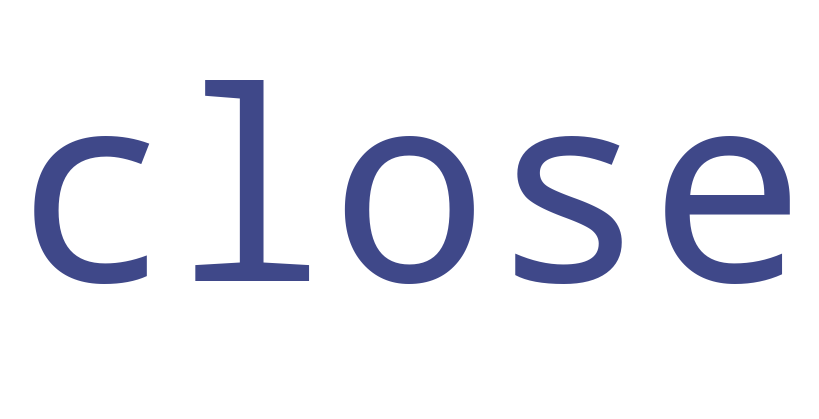

In [11]:
# Import necessary libraries
import random
import collections

# I am using this one for the HW but you can replace it with your own using the function below
def load_text():
    return text_data


# Function to load the text data
def load_text_from_hd(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# Function to build the Markov Chain model
def build_markov_chain(text, order=1):
    markov_chain = collections.defaultdict(list)
    words = text.split()
    for i in range(len(words) - order):
        state = tuple(words[i:i + order])
        next_word = words[i + order]
        markov_chain[state].append(next_word)
    return markov_chain

# Function to generate new text using the Markov Chain model
def generate_text(markov_chain, start_state, num_words=50):
    current_state = start_state
    generated_text = list(current_state)
    for _ in range(num_words):
        next_words = markov_chain[current_state]
        next_word = random.choice(next_words)
        generated_text.append(next_word)
        current_state = tuple(generated_text[-len(current_state):])
    return ' '.join(generated_text)

# Main execution starts here
# Set the parameters
file_path = 'your_text_file.txt'  # Replace with the path to your text file
order = 2
num_words = 50

# Load and prepare the data
text = load_text()
markov_chain = build_markov_chain(text, order)

# Generate new text
start_state = random.choice(list(markov_chain.keys()))
generated_text = generate_text(markov_chain, start_state, num_words)

# Print the generated text
print("Generated Text:")
print(generated_text)
# Plotting function to visualize word transitions (for advanced students)
def plot_word_transitions(markov_chain, state):
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud

    # Check if there are words associated with the given state
    if state not in markov_chain:
        print("No words associated with the given state.")
        return

    # Create a string of all possible next words
    text = ' '.join(markov_chain[state])

    # Check if the text is empty
    if not text:
        print("No words found for the given state.")
        return

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize = (8, 4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()



# Optional: Visualize transitions from a given state
plot_word_transitions(markov_chain, start_state)


# Explanation of build_markov_chain Function

**1. Markov Chain:**
   - A Markov chain is a stochastic process where transitions between states occur based on the current state alone, independent of previous states.

**2. State and Transition:**
   - A state represents a context within the text, typically defined by a sequence of words. Transitions between states correspond to the occurrence of subsequent words in the text.

**3. Order of the Model:**
   - The order of the Markov Chain determines the number of preceding words considered when defining a state.

**4. Transition Probabilities:**
   - Transition probabilities quantify the likelihood of moving from one state to another, estimated from observed frequencies of state transitions in the text data.

**5. Building the Markov Chain:**
   - The `build_markov_chain` function constructs the Markov Chain model by iterating over the text data and creating state-transition pairs.
   - For each word in the text, it defines a state tuple consisting of the current word and the preceding `order - 1` words.
   - It then records the next word in the text after each state, updating the Markov Chain dictionary accordingly.

In summary, the `build_markov_chain` function implements the principles of Markov Chains to model text generation, capturing sequential dependencies between words based on the current state and order of the model.



**Objective:** Implement and experiment with a basic Markov Chain text generation model in Python.

1. **Code Understanding:**
   - Carefully read and understand the provided Python code, paying attention to the functions `load_text_from_hd`, `build_markov_chain`, `generate_text`, and `plot_word_transitions`.
   - Describe in your own words how the Markov Chain model is constructed and how text is generated based on the model.

2. **Experimentation:**
   - Experiment with different values for the `order` parameter in the `build_markov_chain` function. How does changing the order affect the generated text?
   - Try generating text with different numbers of words (`num_words`). How does the length of the generated text impact its coherence and relevance?

3. **Text Data:**
   - Choose or find a text dataset (`your_text_file.txt`) to use as input for the Markov Chain model. It could be a book, an article, or any other text document.
   - Load the chosen text dataset into the Markov Chain model and generate text based on it. Observe any patterns or interesting outcomes.
